# Thrombolysis outcomes

## Aims

Investigate associations with discharge disability.

## Set up

In [1]:
# Import packages and functions
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Set max rows when display dataframe
pd.set_option('display.max_rows', 100)

# Linting
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# Set paths and filenames
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and files.'''

    data_path = './../output/'
    data_filename = 'reformatted_data.csv'
    admission_only_filename = 'reformatted_data_admissions_only.csv'


paths = Paths()

In [3]:
# Load data
data = pd.read_csv(os.path.join(paths.data_path,
                                paths.data_filename))

## Thrombolysis rates

In patients arriving within 4 hours of known onset, there is a very small negative correlation between thrombolysis rate and mean discharge disability.

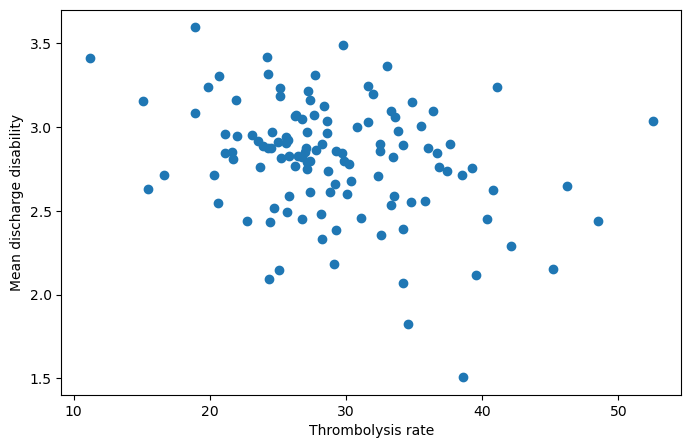

array([[ 1.        , -0.30164004],
       [-0.30164004,  1.        ]])

In [4]:
# Find proportion thrombolysed and mean discharge disability
ivt = data.groupby('stroke_team')['thrombolysis'].mean()*100
discharge = data.groupby('stroke_team')['discharge_disability'].mean()
ivt_discharge = pd.concat(
    [ivt.rename('thrombolysis_rate'),
     discharge.rename('mean_discharge_disability')], axis=1)

# Create scatterplot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x=ivt_discharge['thrombolysis_rate'],
           y=ivt_discharge['mean_discharge_disability'])
ax.set_xlabel('Thrombolysis rate')
ax.set_ylabel('Mean discharge disability')
plt.show()

np.corrcoef(ivt_discharge['thrombolysis_rate'],
            ivt_discharge['mean_discharge_disability'])